In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import  os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = '/content/drive/MyDrive/Alzheimer_data/Alzheimer_data'

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=20,
                                 width_shift_range=0.2,zoom_range=0.2, horizontal_flip=True,
                                 validation_split=0.2)

In [ ]:
train_generator=train_datagen.flow_from_directory(data_dir,target_size=(224,224),
                                                  batch_size=32,class_mode='categorical',
                                                  subset='training')
val_generator=train_datagen.flow_from_directory(data_dir,target_size=(224,224),
                                                batch_size=32,class_mode='categorical',
                                                subset='validation')

Found 26 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax') # Changed the output layer to 4 units
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=100,validation_data=val_generator)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0385 - loss: 1.3957 - val_accuracy: 0.2500 - val_loss: 1.7241
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3462 - loss: 1.4808 - val_accuracy: 0.2500 - val_loss: 1.2944
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1538 - loss: 1.4765 - val_accuracy: 0.2500 - val_loss: 1.4005
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2308 - loss: 1.3967 - val_accuracy: 0.2500 - val_loss: 1.3744
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2692 - loss: 1.3483 - val_accuracy: 0.5000 - val_loss: 1.3550
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5385 - loss: 1.3383 - val_accuracy: 0.7500 - val_loss: 1.3302
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3462 - loss: 1.3732 - val_accuracy: 0.2500 - val_loss: 1.3578
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3462 - loss: 1.3363 - val_accuracy: 0.5000 - val_loss: 1.3620
Epoch 9/100
1/1 ━━━━

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the true labels and predictions from the validation generator
y_true = val_generator.classes  # True labels for the validation data
y_pred = model.predict(val_generator) # Predictions on the validation data
y_pred = y_pred.argmax(axis=1)  # Convert predictions to class labels


# Calculate the metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Accuracy: 0.75
Precision: 0.6250
Recall: 0.7500
F1 Score: 0.6667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


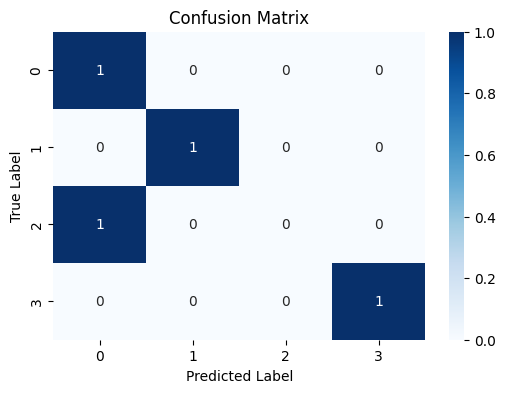

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
# Replaced y_test with y_true, which holds the true labels for the validation data
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

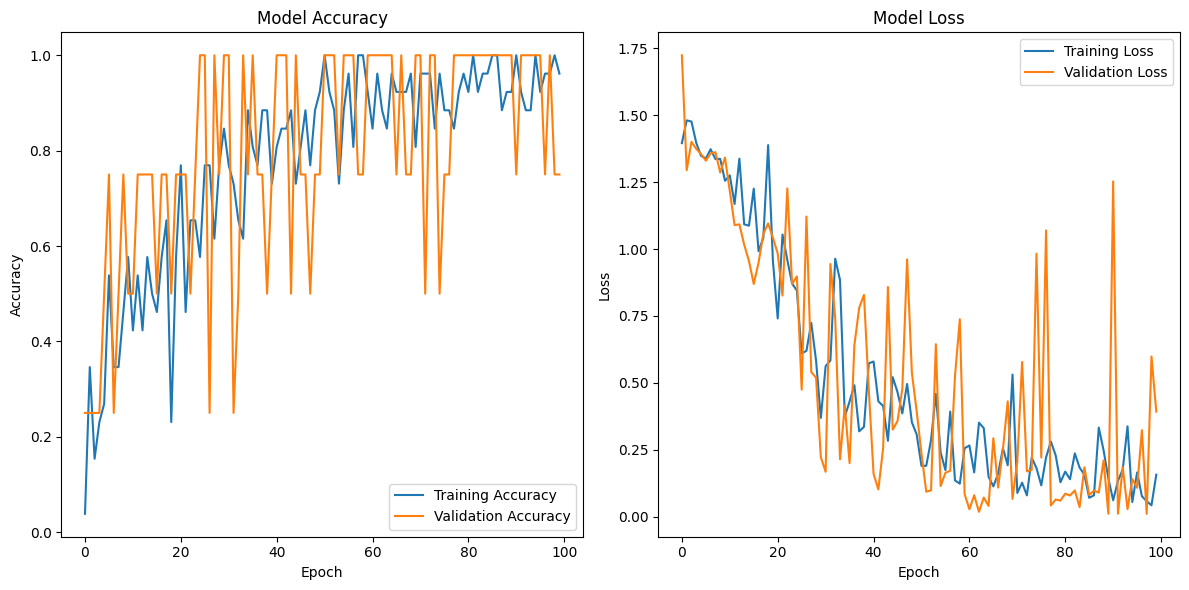

In [ ]:
# Assuming you have a training history from model.fit() stored in `history`
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


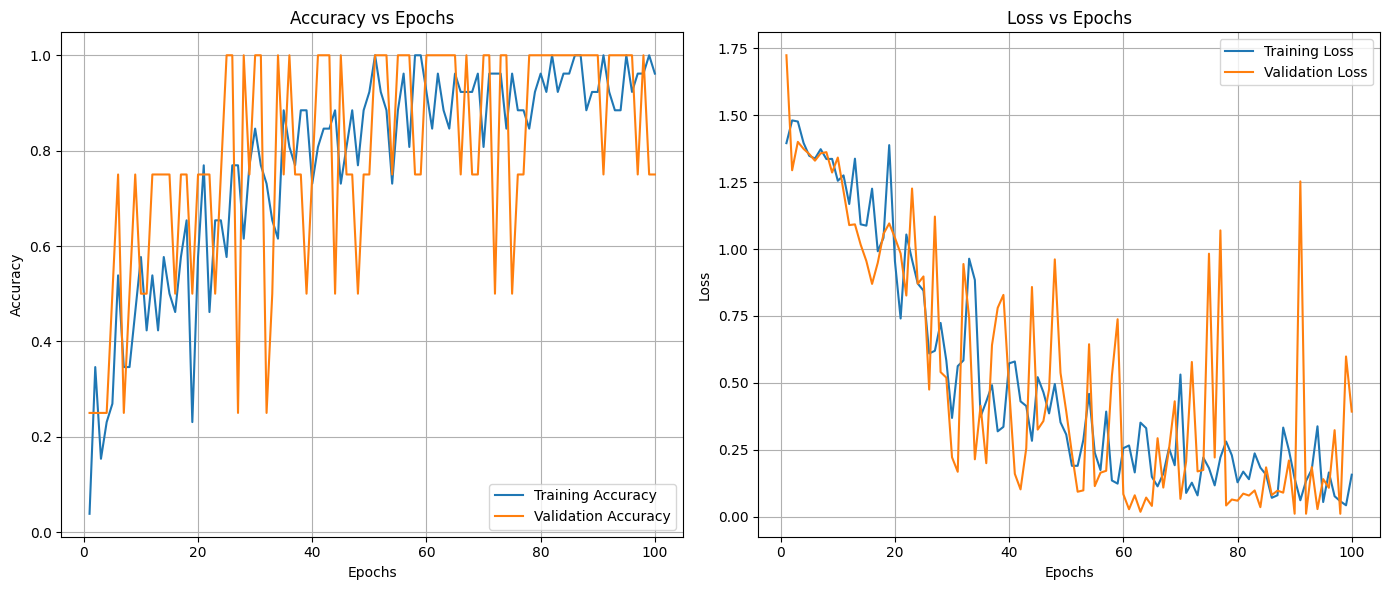

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy and Loss
def plot_loss_accuracy(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Plotting Accuracy
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plotting Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function with your history object
plot_loss_accuracy(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


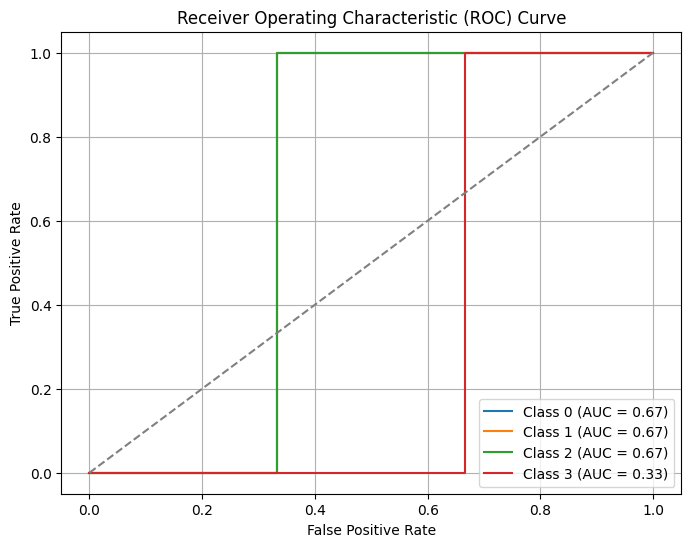

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Get the true labels and predicted probabilities
y_true = val_generator.classes  # True labels from validation data
y_pred_proba = model.predict(val_generator)  # Predicted probabilities

# Binarize the true labels for multiclass classification
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])  # Adjust classes as per your dataset

# Initialize dictionaries to store ROC curve results
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class (One-vs-Rest approach)
for i in range(y_true_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(8, 6))
for i in range(y_true_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


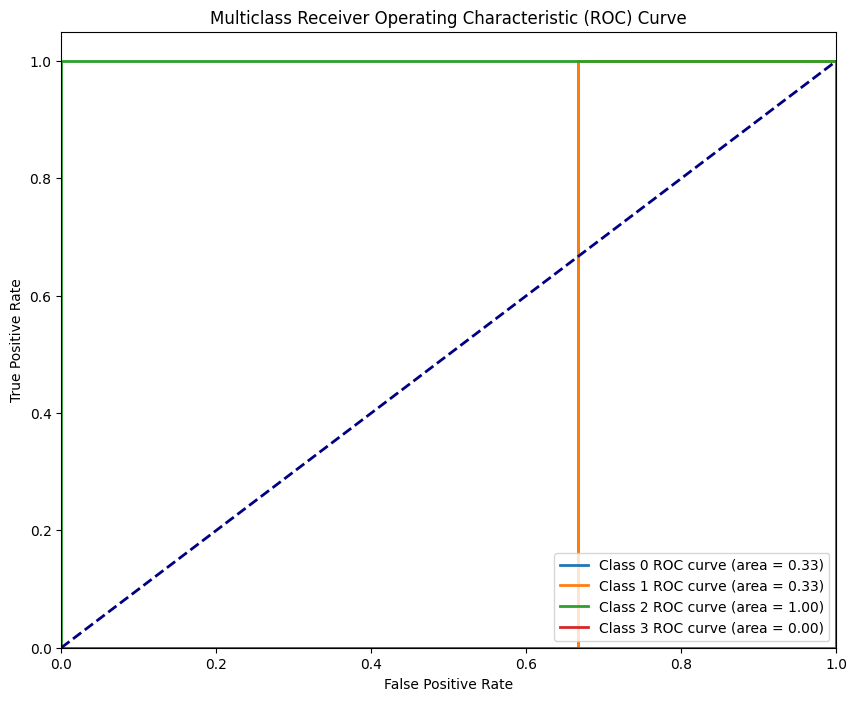

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test and y_pred_prob are already defined
# Binarize the true labels for multiclass problems

# Assuming 'model' is your trained Keras model
y_pred_prob = model.predict(val_generator) # Predict probabilities using the validation generator

n_classes = y_pred_prob.shape[1]
# Assuming 'y_true' is your true labels for the validation data (as defined in previous cells)
y_test_bin = label_binarize(y_true, classes=list(range(n_classes)))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line (random chance)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

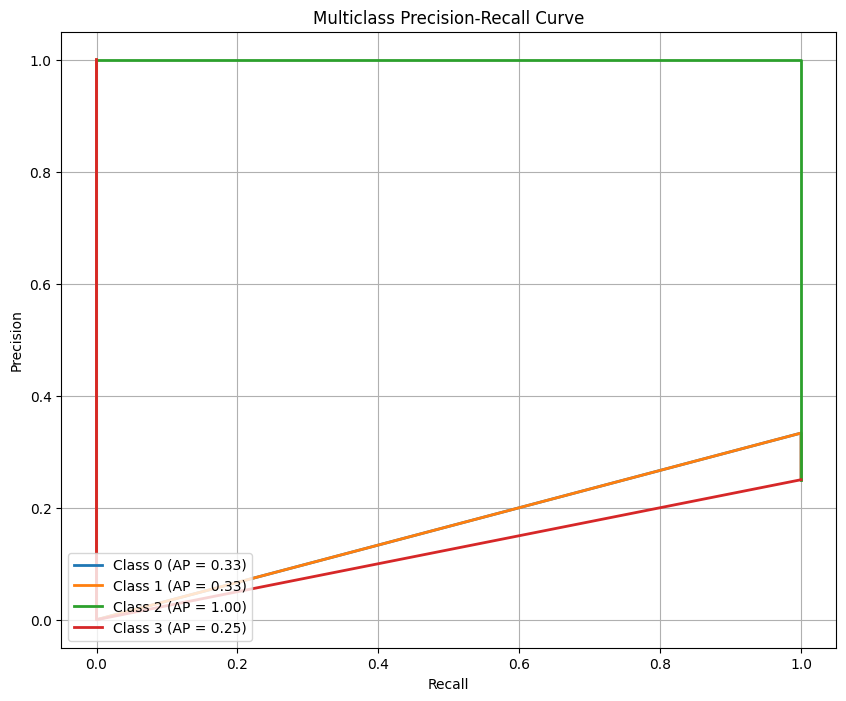

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming y_true and y_pred_prob are already defined
# Binarize the true labels for multiclass problems
n_classes = y_pred_prob.shape[1]
# Use y_true instead of y_test
y_test_bin = label_binarize(y_true, classes=list(range(n_classes))) # Changed y_test to y_true

# Initialize plot
plt.figure(figsize=(10, 8))

# Plot Precision-Recall curve for each class
for i in range(n_classes):
    precision_vals, recall_vals, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall_vals, precision_vals, lw=2, label=f'Class {i} (AP = {average_precision:.2f})')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [ ]:
val_loss,val_acc=model.evaluate(val_generator)

print(f'Validation Accuracy: {(val_acc*100):.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7500 - loss: 0.3491
Validation Accuracy: 75.00%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (your existing code to load and predict using the model) ...

# Assuming 'y_true' are the true labels and 'y_pred' are the predicted labels
y_pred = model.predict(val_generator).argmax(axis=1)  # Get predicted class labels

cm = confusion_matrix(y_true, y_pred)  # Calculate the confusion matrix

# Now you can use 'cm' in the heatmap


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


In [ ]:
print(classification_report(val_generator.classes, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.88      0.75      0.67         4
weighted avg       0.88      0.75      0.67         4

